<a href="https://colab.research.google.com/github/dk-wei/dl-recomm-algo-implementation/blob/main/Wide_n_deep_rergression%E6%A8%A1%E5%9E%8B%E7%AE%80%E5%8D%95%E5%AE%9E%E7%8E%B0(multi_input_output).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial: https://www.youtube.com/watch?v=A1jXrZNZwSs&list=PLFI1Cd4723_RLWCCLVw35l03Om4tamUMW&index=25     
Notebook: https://github.com/KibaAmor/tf2-study-notebook/blob/master/chapter_2/tf_keras_regression-wide_deep-multi-output.ipynb

![](https://pic3.zhimg.com/80/v2-454e014689c267d3093844af23d82f42_1440w.jpg)

In [ ]:
!pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
!python -m pip install -U pip
!pip -V
#!pip install sklearn pandas

Writing to /root/.config/pip/pip.conf
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 1.6MB 230kB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [ ]:
print(tf.__version__)
print(sys.version_info)

for module in mpl, np, pd, sklearn, tf, keras:
  print(module.__name__, module.__version__)

2.5.0
sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.19.5
pandas 1.1.5
sklearn 0.22.2.post1
tensorflow 2.5.0
tensorflow.keras 2.5.0


In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [ ]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [ ]:
pd.DataFrame(x_train_all).head()

,0,1,2,3,4,5,6,7
0,1.7250,52.0,3.386216,1.088427,1798.0,2.338101,37.88,-122.26
1,3.3120,17.0,6.451758,1.390426,3497.0,2.615557,33.72,-116.37
2,1.2469,33.0,4.773256,1.052326,579.0,3.366279,35.37,-119.01
3,2.9018,22.0,4.753346,1.162524,709.0,1.355641,34.23,-119.29
4,6.3716,30.0,5.510417,0.962500,1506.0,3.137500,37.33,-121.98


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# 多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])

hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.concatenate([input_wide, hidden2]) 

# 多输出
output = keras.layers.Dense(1)(concat)  
output2 = keras.layers.Dense(2)(hidden2)

In [ ]:
# 创建完数据集，一定要用model固定下来

# 双输入，双输出
model = keras.models.Model(inputs = [input_wide, input_deep],
                         outputs = [output, output2])

model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
]

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           210         input_8[0][0]                    
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           930         dense_12[0][0]                   
____________________________________________________________________________________________

In [ ]:
# wide和deep方向选取不同的features

x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide  = x_test_scaled[:, :5]
x_test_scaled_deep  = x_test_scaled[:, 2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep], [y_train, y_train],
                   validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], [y_valid, y_valid]),
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 3.7369 - dense_14_loss: 1.6990 - dense_15_loss: 2.0379 - val_loss: 1.7172 - val_dense_14_loss: 0.7576 - val_dense_15_loss: 0.9596
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 1.2839 - dense_14_loss: 0.5650 - dense_15_loss: 0.7190 - val_loss: 1.1599 - val_dense_14_loss: 0.5140 - val_dense_15_loss: 0.6459
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 1.0570 - dense_14_loss: 0.4676 - dense_15_loss: 0.5894 - val_loss: 1.0563 - val_dense_14_loss: 0.4673 - val_dense_15_loss: 0.5890
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.9885 - dense_14_loss: 0.4345 - dense_15_loss: 0.5540 - val_loss: 1.0198 - val_dense_14_loss: 0.4407 - val_dense_15_loss: 0.5791
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.9475 - dense_14_loss: 0.4144 - dense_15_loss: 0.5330 - val_loss: 0.9725 - val_dense_14_loss: 0.4240 - v

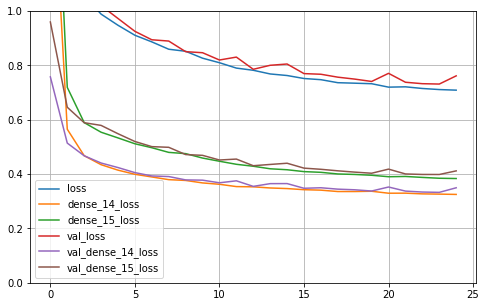

In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history) 

In [ ]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.7459 - dense_14_loss: 0.3499 - dense_15_loss: 0.3960


[0.7459043860435486, 0.3498656749725342, 0.39603883028030396]